# First laboratory

## Step 1 - Subsample with main variables

In [25]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [26]:
sub_sample_columns = ['Organic_carbon', 'ph', 'Chloramines']
sub_sample = data[sub_sample_columns]
sub_sample = sub_sample[sub_sample.isna().sum(axis=1) == 0]
sub_sample.sample(n=10)

,Organic_carbon,ph,Chloramines
1500,12.446976,6.897923,6.352934
1373,10.613710,8.458815,6.410043
2026,17.249616,7.078361,6.931096
1885,10.689769,5.648629,7.735348
2789,17.128155,8.592418,8.172356
1593,11.009592,7.571684,9.566105
512,16.697408,7.803833,6.664969
2871,12.534560,6.977744,6.609706
2125,19.296765,6.093092,9.600683
1146,12.495658,7.623500,6.040735


## Step 2 - non-parametric estimation of PDF

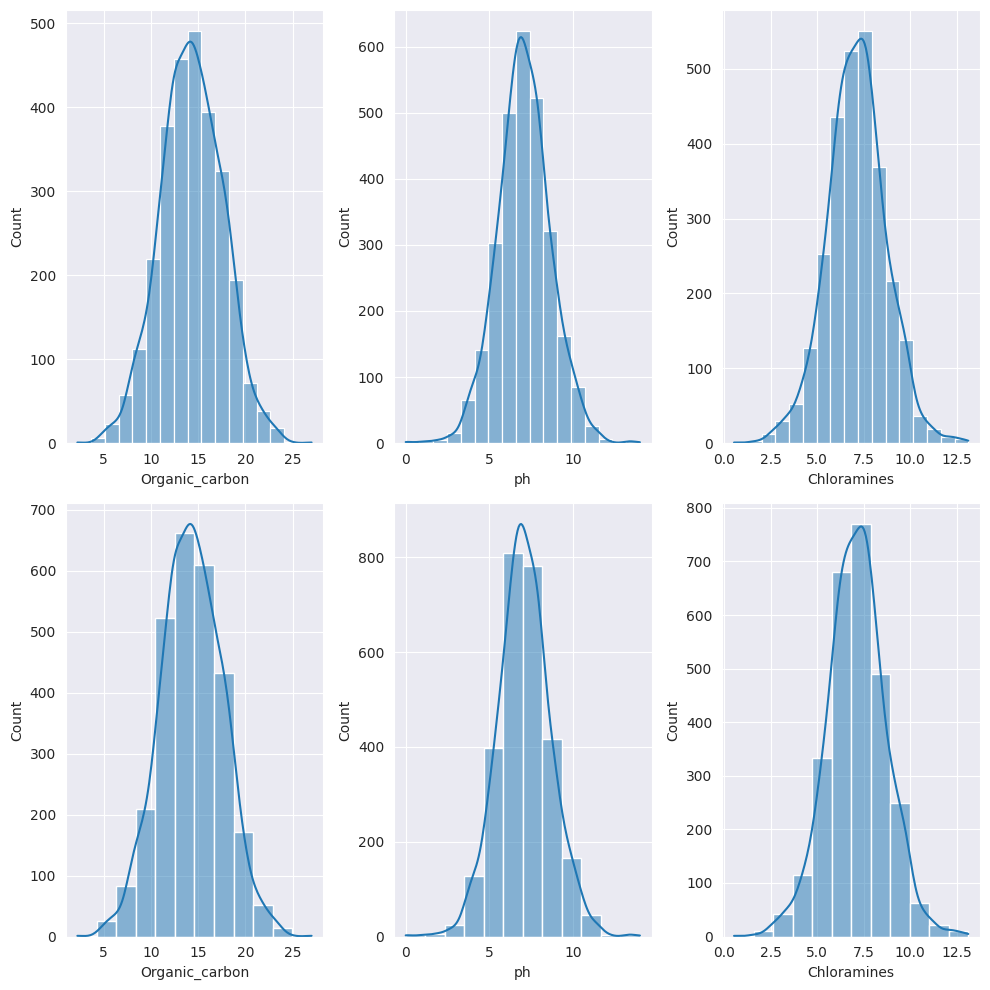

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

bins_count = [np.rint(np.log10(sub_sample.shape[0]) * 5), np.rint(1 + 3.32 * np.log10(sub_sample.shape[0]))]
bins_count = np.array(bins_count, dtype=np.int32)

fig, ax = plt.subplots(len(bins_count), len(sub_sample_columns), figsize=(10, 10), tight_layout=True)

for bin_index, bin_count in enumerate(bins_count):
    for col_index, column in enumerate(sub_sample_columns):
        sns.histplot(
            sub_sample[column],
            kde=True,
            bins=bin_count,
            ax=ax[bin_index][col_index],
        )
plt.savefig('./figures/pdf.png', bbox_inches='tight')

## Step 3 - estimation of order statistics

In [28]:
sub_sample.describe()

,Organic_carbon,ph,Chloramines
count,2785.000000,2785.000000,2785.000000
mean,14.308514,7.080795,7.126535
std,3.304141,1.594320,1.590114
min,2.200000,0.000000,0.530351
25%,12.095251,6.093092,6.127804
50%,14.252684,7.036752,7.130161
75%,16.574190,8.062066,8.108318
max,27.006707,14.000000,13.127000


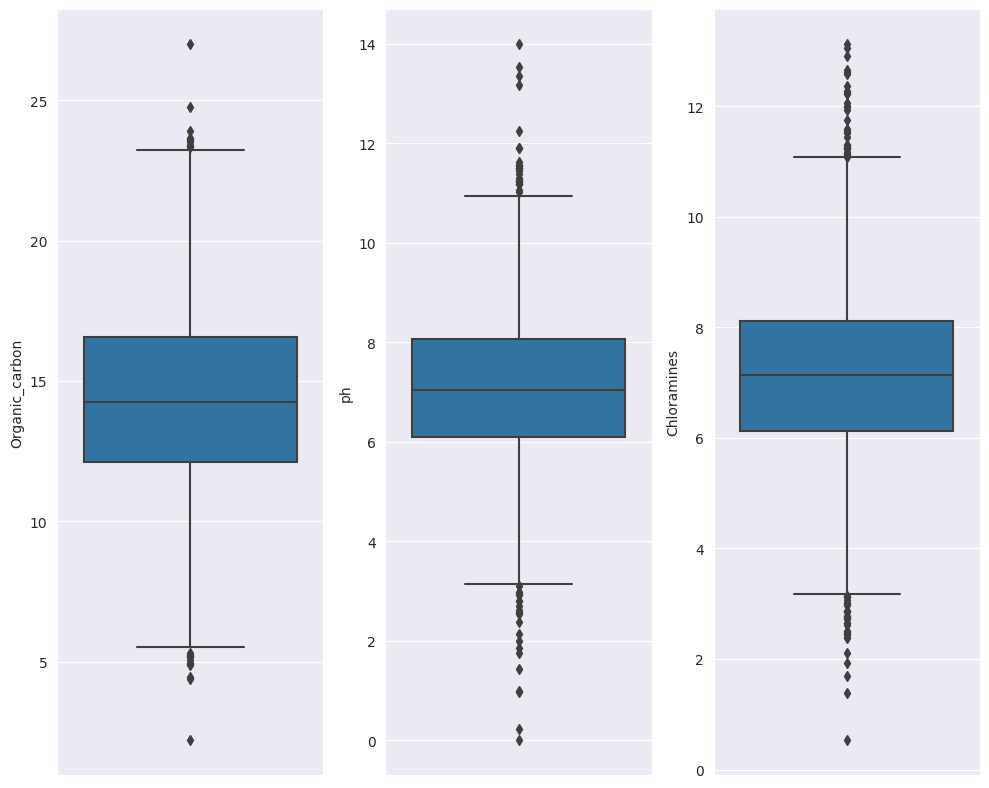

In [29]:
fig, ax = plt.subplots(1, len(sub_sample_columns), figsize=(10, 8), tight_layout=True)

for col_index, column in enumerate(sub_sample_columns):
    sns.boxplot(y=sub_sample[column], ax=ax[col_index])

plt.savefig('./figures/quantiles.png', bbox_inches='tight')

## Step 4 - theoretical distributions

In [30]:
import scipy


def plot_density(sample_data, x_points, function_class, function_args, name):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    sns.histplot(
        sample_data,
        bins=bins_count[0],
        ax=ax,
        stat="density"
    )
    ax.plot(
        np.linspace(*x_points),
        function_class.pdf(np.linspace(*x_points), *function_args),
        label=name
    )
    ax.legend(loc='best')
    plt.title(f'{sample_data.name} {name}')
    plt.savefig(f'./figures/{sample_data.name}_{name}.png')
    plt.show()

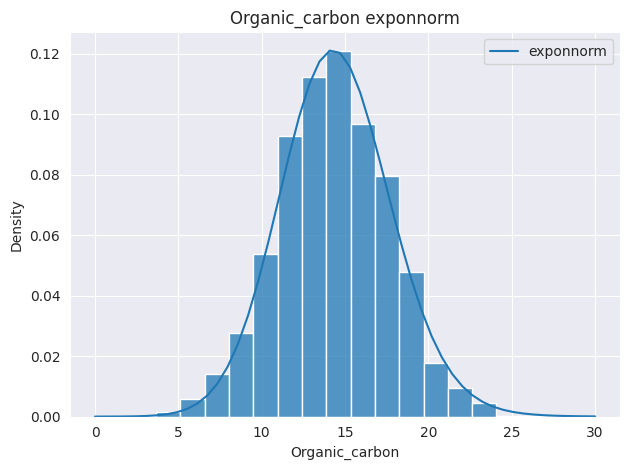

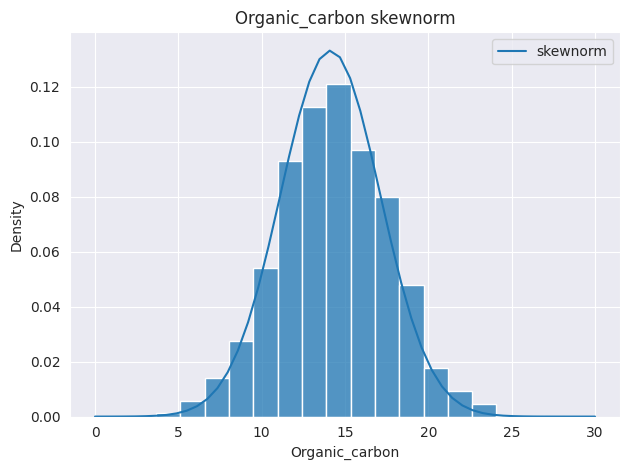

In [31]:
plot_density(sub_sample[sub_sample_columns[0]], (0, 30), scipy.stats.exponnorm, (0.5, 13, 3), 'exponnorm')
plot_density(sub_sample[sub_sample_columns[0]], (0, 30), scipy.stats.skewnorm, (0.05, 14, 3), 'skewnorm')

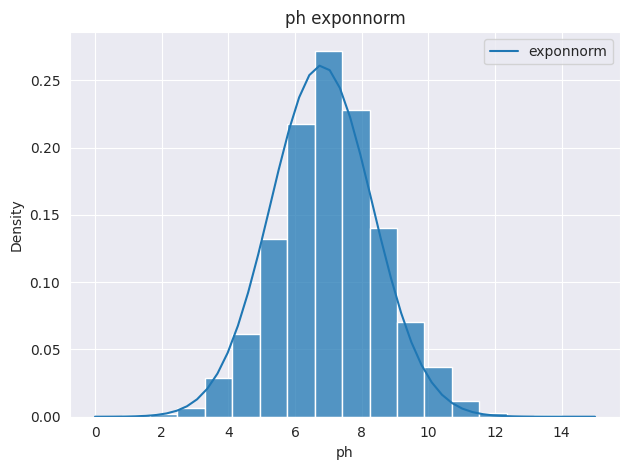

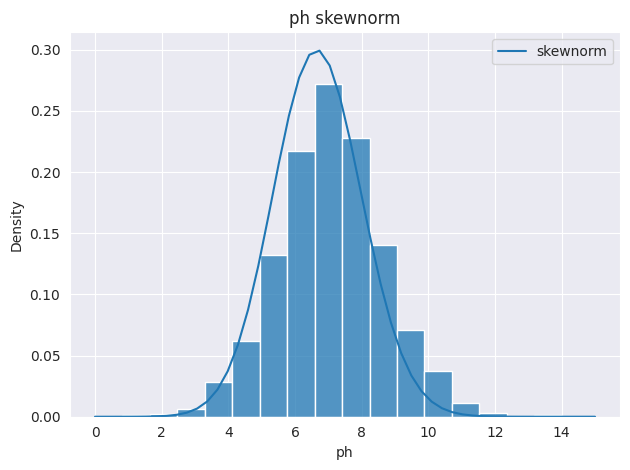

In [32]:
plot_density(sub_sample[sub_sample_columns[1]], (0, 15), scipy.stats.exponnorm, (0.2, 6.5, 1.5), 'exponnorm')
plot_density(sub_sample[sub_sample_columns[1]], (0, 15), scipy.stats.skewnorm, (0.7, 6, 1.5), 'skewnorm')

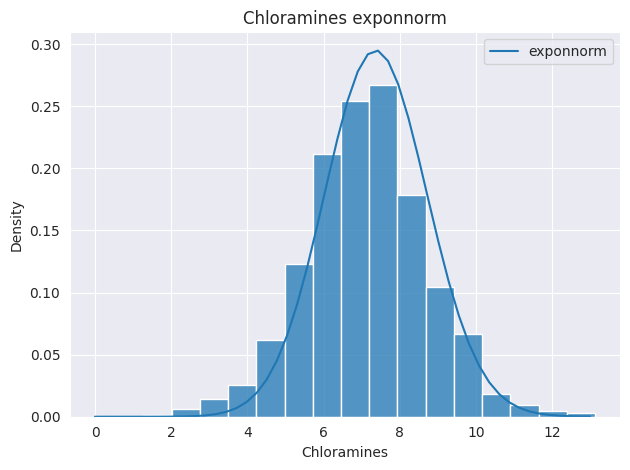

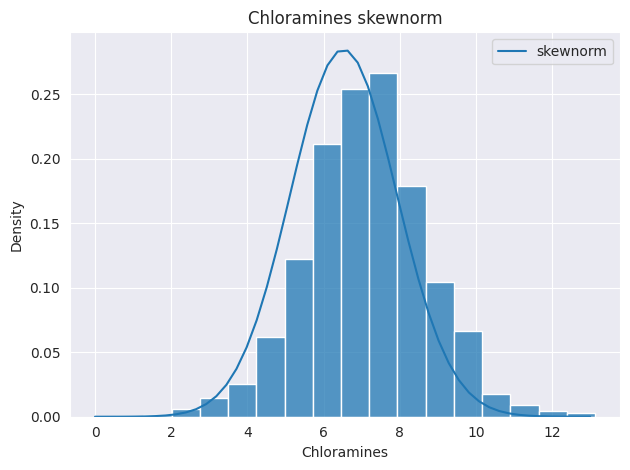

In [33]:
plot_density(sub_sample[sub_sample_columns[2]], (0, 13), scipy.stats.exponnorm, (0.3, 7, 1.3), 'exponnorm')
plot_density(sub_sample[sub_sample_columns[2]], (0, 13), scipy.stats.skewnorm, (0.5, 6, 1.5), 'skewnorm')

## Step 5 - estimate distribution parameters

### Maximum likelihood method

In [34]:
def mlm_method(function, data):
    return function.fit(data, method='MLE')

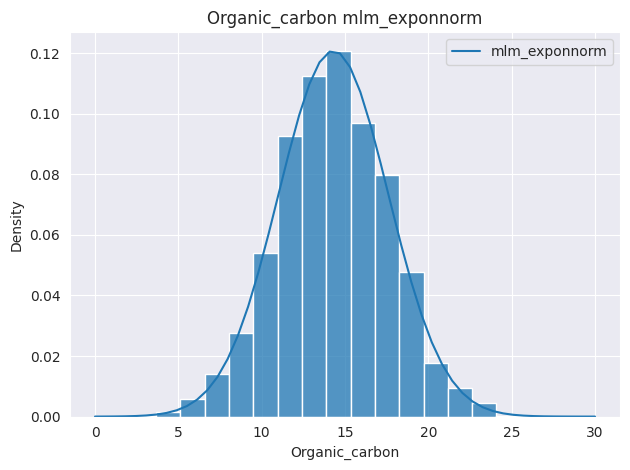

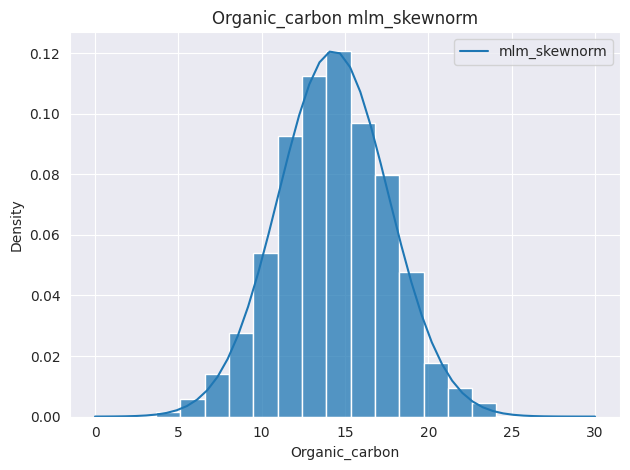

In [35]:
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.exponnorm,
    mlm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[0]]),
    'mlm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.skewnorm,
    mlm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[0]]),
    'mlm_skewnorm'
)

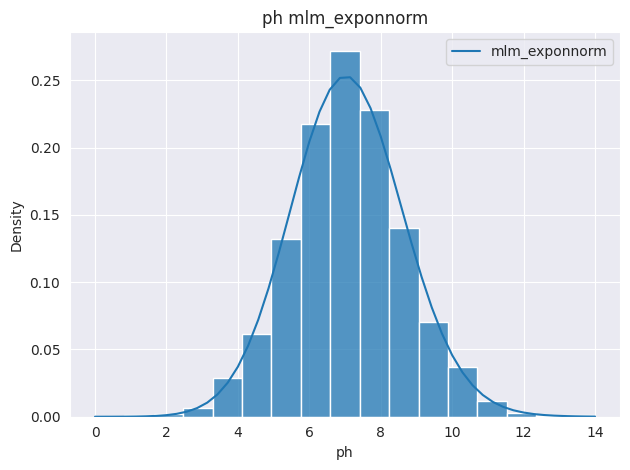

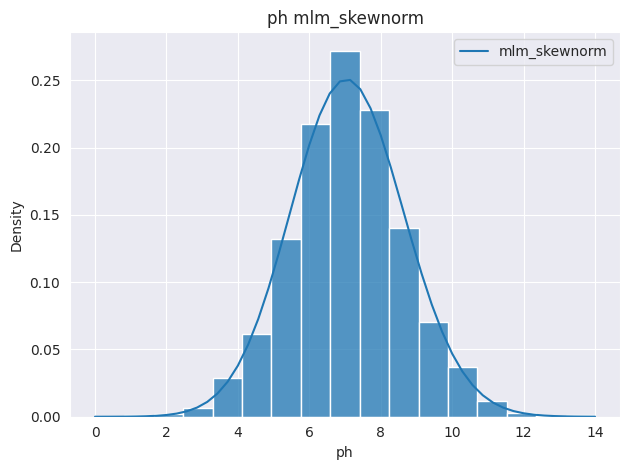

In [36]:
plot_density(
    sub_sample[sub_sample_columns[1]],
    (0, 14),
    scipy.stats.exponnorm,
    mlm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[1]]),
    'mlm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[1]],
    (0, 14),
    scipy.stats.skewnorm,
    mlm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[1]]),
    'mlm_skewnorm'
)

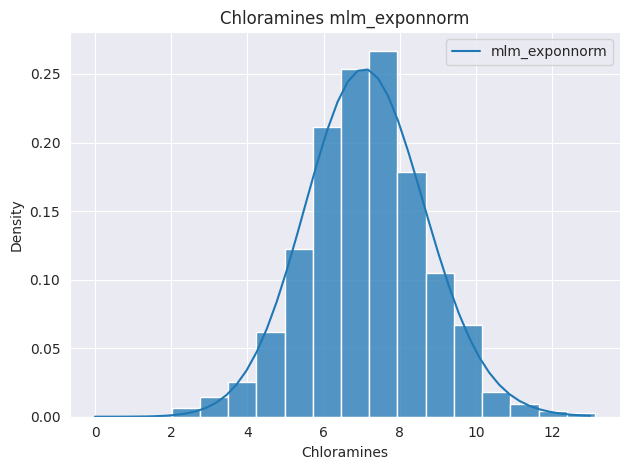

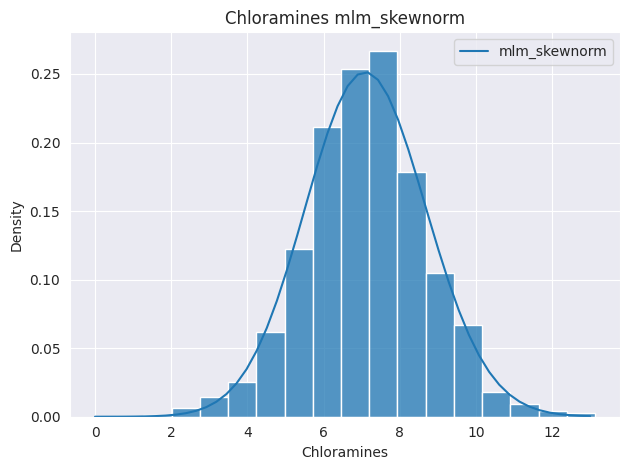

In [37]:
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.exponnorm,
    mlm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[2]]),
    'mlm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.skewnorm,
    mlm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[2]]),
    'mlm_skewnorm'
)

### Least squares method.

In [39]:
def lsm_method(function_class, data):
    def function(point, a, b, c):
        return function_class.pdf(point, a, b, c)
    y, x = np.histogram(data, bins=bins_count[0], density=True)
    ls, _ = scipy.optimize.curve_fit(function, xdata=x[:bins_count[0]], ydata=y[:bins_count[0]], method='lm')
    return ls

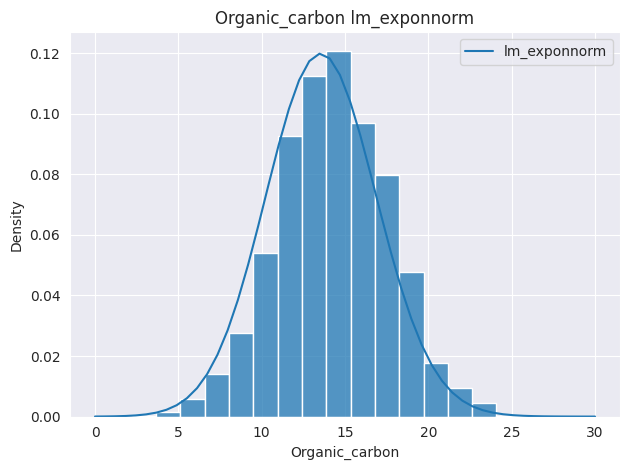

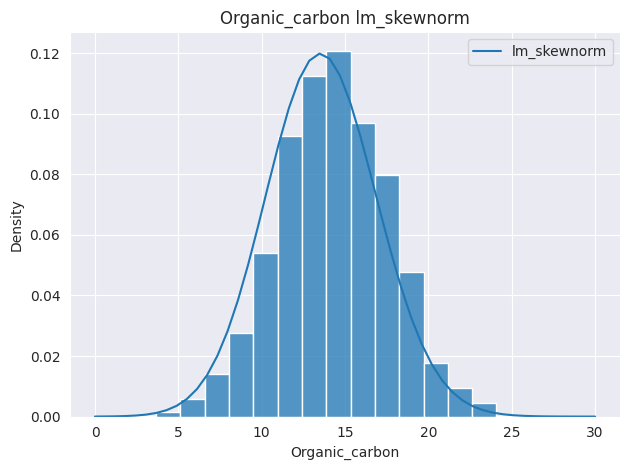

In [40]:
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.exponnorm,
    tuple(lsm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[0]])),
    'lm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[0]],
    (0, 30),
    scipy.stats.skewnorm,
    tuple(lsm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[0]])),
    'lm_skewnorm'
)

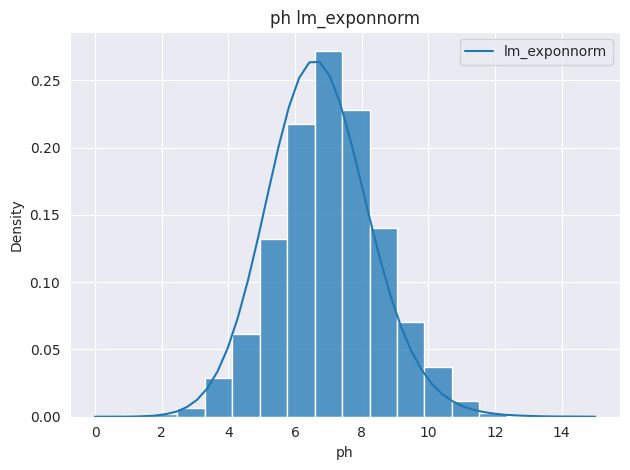

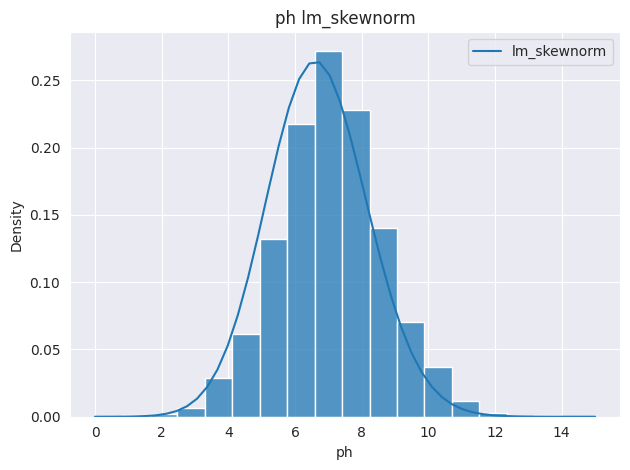

In [41]:
plot_density(
    sub_sample[sub_sample_columns[1]],
    (0, 15),
    scipy.stats.exponnorm,
    tuple(lsm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[1]])),
    'lm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[1]],
    (0, 15),
    scipy.stats.skewnorm,
    tuple(lsm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[1]])),
    'lm_skewnorm'
)

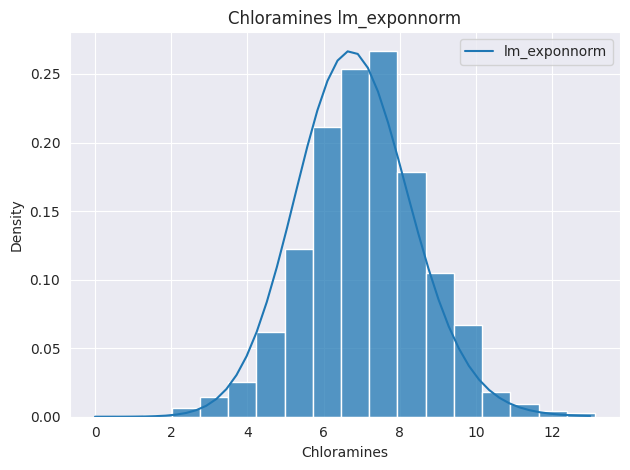

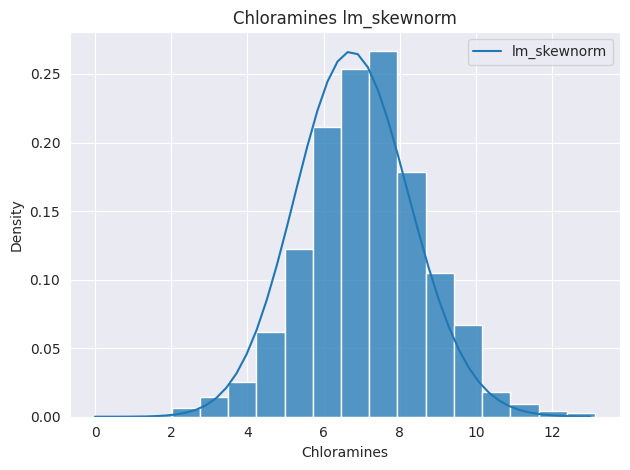

In [42]:
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.exponnorm,
    tuple(lsm_method(scipy.stats.exponnorm, sub_sample[sub_sample_columns[2]])),
    'lm_exponnorm'
)
plot_density(
    sub_sample[sub_sample_columns[2]],
    (0, 13),
    scipy.stats.skewnorm,
    tuple(lsm_method(scipy.stats.skewnorm, sub_sample[sub_sample_columns[2]])),
    'lm_skewnorm'
)

In [46]:
raw_data = []
for column in sub_sample_columns:
    for method, method_name in zip([mlm_method, lsm_method], ['mlm', 'lsm']):
        for func, func_name in zip([scipy.stats.exponnorm, scipy.stats.skewnorm], ['exponnorm', 'skewnorm']):
            raw_data.append([column, method_name, func_name] + list(method(func, sub_sample[column])))


pd.DataFrame(columns=['column', 'method', 'function', 'a', 'b', 'c'], data=raw_data)

,column,method,function,a,b,c
0,Organic_carbon,mlm,exponnorm,0.110881,13.944445,3.283424
1,Organic_carbon,mlm,skewnorm,0.218074,13.738608,3.352345
2,Organic_carbon,lsm,exponnorm,0.303769,12.633197,3.198679
3,Organic_carbon,lsm,skewnorm,0.707756,11.884863,3.760241
4,ph,mlm,exponnorm,0.404476,6.483458,1.476840
5,ph,mlm,skewnorm,0.675912,6.285081,1.781607
6,ph,lsm,exponnorm,0.561620,5.961276,1.349323
7,ph,lsm,skewnorm,0.881237,5.742843,1.785416
8,Chloramines,mlm,exponnorm,0.403953,6.531370,1.473330
9,Chloramines,mlm,skewnorm,0.646371,6.362881,1.763729


## Step 6 - validation via QQ biplots

In [19]:
def b_plot(function_class, data, name):
    fig, ax = plt.subplots(1, 1)
    args = function_class.fit(data)
    scipy.stats.probplot(data, dist=function_class, sparams=args, plot=ax)
    ax.set_title(name)
    plt.savefig(f'figures/{name}.png')
    plt.show()

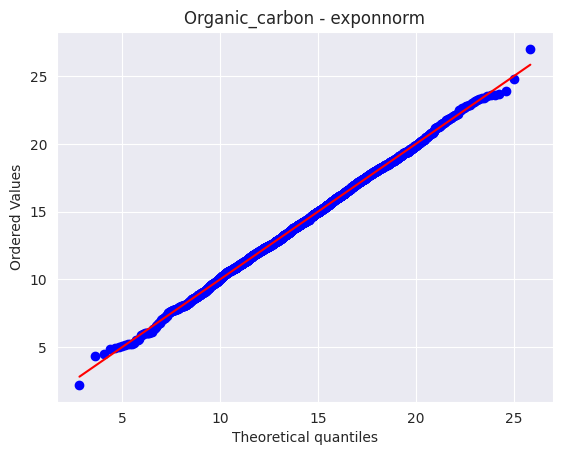

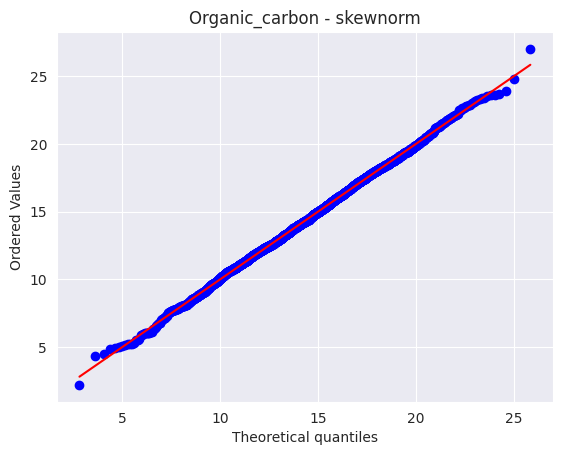

In [20]:
b_plot(scipy.stats.exponnorm, sub_sample[sub_sample_columns[0]], f'{sub_sample_columns[0]} - exponnorm')
b_plot(scipy.stats.skewnorm, sub_sample[sub_sample_columns[0]], f'{sub_sample_columns[0]} - skewnorm')

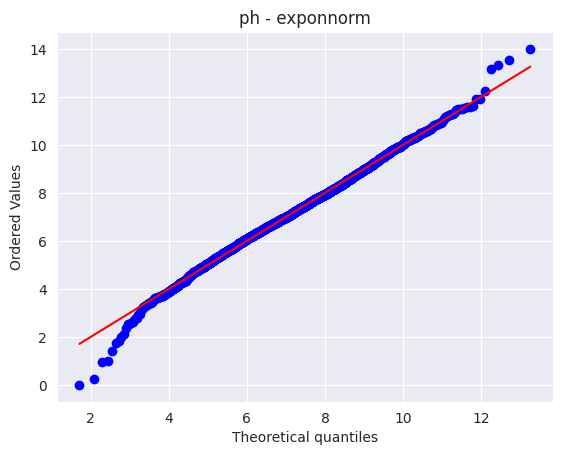

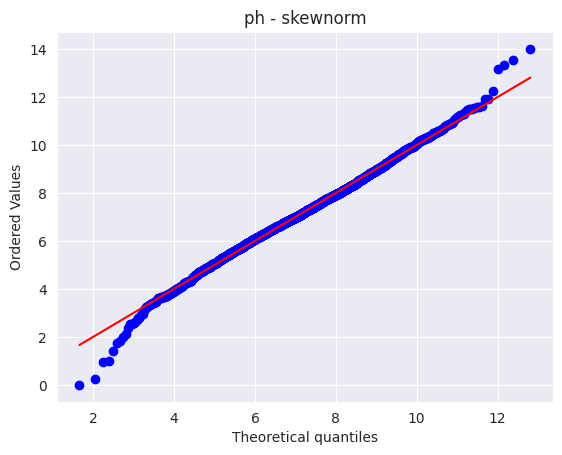

In [21]:
b_plot(scipy.stats.exponnorm, sub_sample[sub_sample_columns[1]], f'{sub_sample_columns[1]} - exponnorm')
b_plot(scipy.stats.skewnorm, sub_sample[sub_sample_columns[1]], f'{sub_sample_columns[1]} - skewnorm')

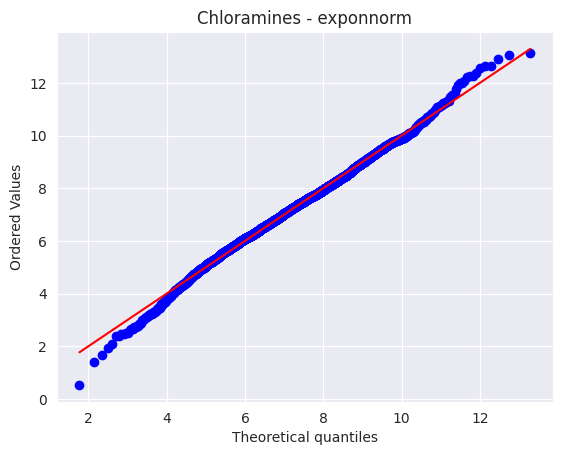

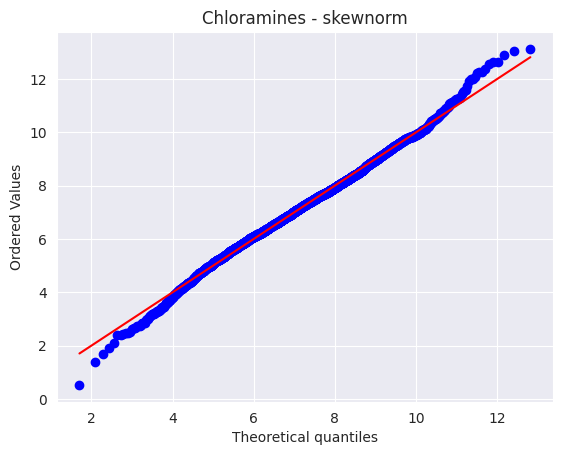

In [22]:

b_plot(scipy.stats.exponnorm, sub_sample[sub_sample_columns[2]], f'{sub_sample_columns[2]} - exponnorm')
b_plot(scipy.stats.skewnorm, sub_sample[sub_sample_columns[2]], f'{sub_sample_columns[2]} - skewnorm')

## Step 7 - statistical tests

In [23]:
def stat_tests(function_class, data):
    args = function_class.fit(data)
    k_test = scipy.stats.kstest(rvs=data, cdf=function_class.cdf, args=args)
    cvm_test = scipy.stats.cramervonmises(rvs=data, cdf=function_class.cdf, args=args)
    return k_test, cvm_test

def plot_test(function_class, data, name):
    k_test, cvm_test = stat_tests(function_class, data)
    print(name)
    print(f'\t Kolmogorov-Smirnov test: pValue - {k_test.pvalue} | statistic - {k_test.statistic}')
    print(f'\t Cramer–Von Mises test: pValue - {cvm_test.pvalue} | statistic - {cvm_test.statistic}')

In [24]:
for func, func_name in zip([scipy.stats.skewnorm, scipy.stats.exponnorm], ['skewnorm', 'exponnorm']):
    for column in sub_sample_columns:
        plot_test(func, sub_sample[column], f'{func_name} for {column}')


skewnorm for Organic_carbon
	 Kolmogorov-Smirnov test: pValue - 0.7648883357738462 | statistic - 0.012583829268415836
	 Cramer–Von Mises test: pValue - 0.8142854937216882 | statistic - 0.059957946080169855
skewnorm for ph
	 Kolmogorov-Smirnov test: pValue - 0.21893155337471382 | statistic - 0.019862941209569662
	 Cramer–Von Mises test: pValue - 0.11784747169308307 | statistic - 0.3213189437632197
skewnorm for Chloramines
	 Kolmogorov-Smirnov test: pValue - 0.1282227144823449 | statistic - 0.02214699028225897
	 Cramer–Von Mises test: pValue - 0.11878554444422584 | statistic - 0.3200767583657584
exponnorm for Organic_carbon
	 Kolmogorov-Smirnov test: pValue - 0.7673066575530656 | statistic - 0.01255516732272044
	 Cramer–Von Mises test: pValue - 0.8149275611880995 | statistic - 0.05985603193390934
exponnorm for ph
	 Kolmogorov-Smirnov test: pValue - 0.22809396394660608 | statistic - 0.019676578965014596
	 Cramer–Von Mises test: pValue - 0.17739579087525725 | statistic - 0.2588636557997592